In [9]:
import BigKindsParser as bkp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [10]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['figure.figsize'] = 10,10
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')

In [11]:
df = pd.read_excel('./econo_columns_20170510-20220509.xlsx')

## 언론사 빈도 확인

In [5]:
df_key = bkp.press_counter(df)

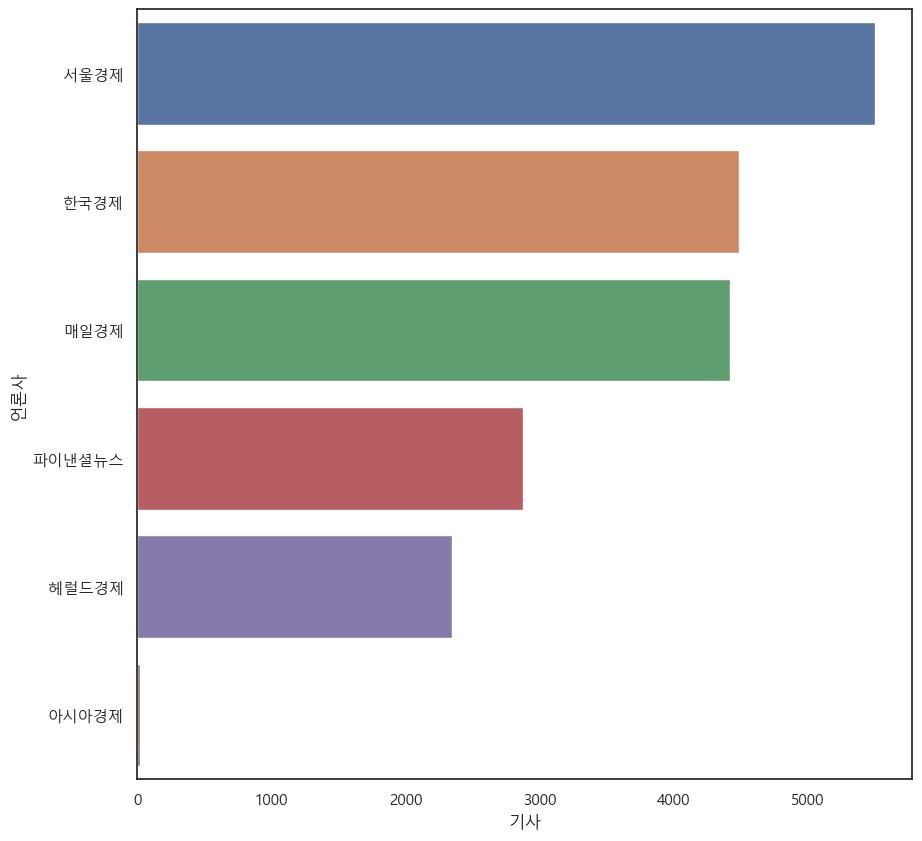

<Figure size 1000x1000 with 0 Axes>

In [6]:
sns.barplot(data = df_key, x = '기사', y = '언론사')

plt.figure(facecolor = 'white')
plt.show()

## 이상치 확인

In [6]:
outlier = df[df['언론사'] == '아시아경제'] ##아시아 경제 기사 추가 크롤링 필요

In [7]:
outlier.info

<bound method DataFrame.info of             뉴스 식별자        일자    언론사  기고자                                 제목  \
238   2.100801e+06  20220415  아시아경제  이지은        [기자수첩] 퇴임 기자회견 생략한 '소통 대통령'   
387   2.100801e+06  20220331  아시아경제  서소정                        [초동시각] 통화전쟁   
398   2.100801e+06  20220330  아시아경제  배경환                     [초동시각]인수위의 '삽'   
639   2.100801e+06  20220307  아시아경제  NaN      [시론]한국은행의 국채 매입과 통화정책의 (불)투명성   
898   2.100801e+06  20220209  아시아경제  유현석        [톺아보기]대한민국의 항공산업, 원팀만이 살길이다   
1400  2.100801e+06  20211217  아시아경제  차민영        [시시비비]디지털 시대, 정부 시장 괴리 해결돼야   
2334  2.100801e+06  20210910  아시아경제  이종길                 [최준영의 도시순례]신도시와 골목   
2711  2.100801e+06  20210804  아시아경제  강희종              [시시비비]딜레마에 빠진 기후변화 대응   
2789  2.100801e+06  20210727  아시아경제  김현정               [광장] 더 든든해진 근로장려금 제도   
2895  2.100801e+06  20210716  아시아경제  이종길                  [최준영의 도시순례]서울의 기억   
3094  2.100801e+06  20210625  아시아경제  이종길              [최준영의 도시순례]전기의 시대와 도시   
3231  2.100801e+06  

In [8]:
outlier['일자'] #아시아경제 기사는 2021년부터 빅카인즈에 기사를 업로드 --> 2017~2020년 기사는 별도 크롤링 필요

238     20220415
387     20220331
398     20220330
639     20220307
898     20220209
1400    20211217
2334    20210910
2711    20210804
2789    20210727
2895    20210716
3094    20210625
3231    20210611
3371    20210528
3501    20210514
3639    20210430
3663    20210428
3733    20210421
3820    20210413
4376    20210215
4544    20210127
Name: 일자, dtype: int64

## 키워드 빈도

In [13]:
df_keywords = df['키워드']

In [14]:
keywords = bkp.keywords_list(df_keywords)

In [15]:
news_key = bkp.keyword_parser(keywords)
news_key = bkp.duplication_remover(news_key)
key = bkp.word_counter(news_key)

In [16]:
news_key = bkp.counter_to_DataFrame(key)

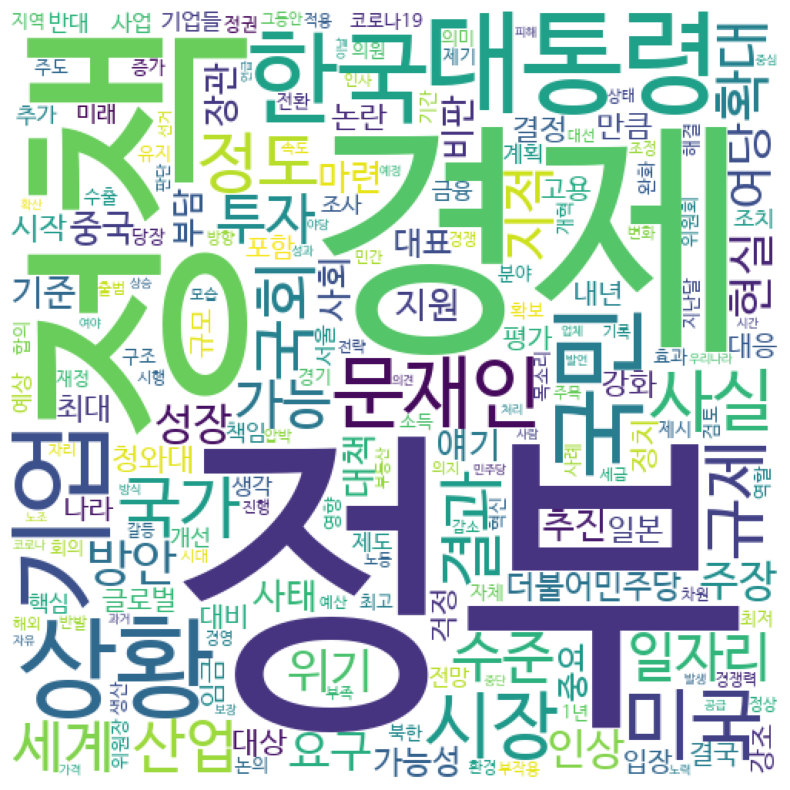

In [17]:
wc = WordCloud(font_path = './NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(news_key.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 언론사별 키워드 분석 --> 한경

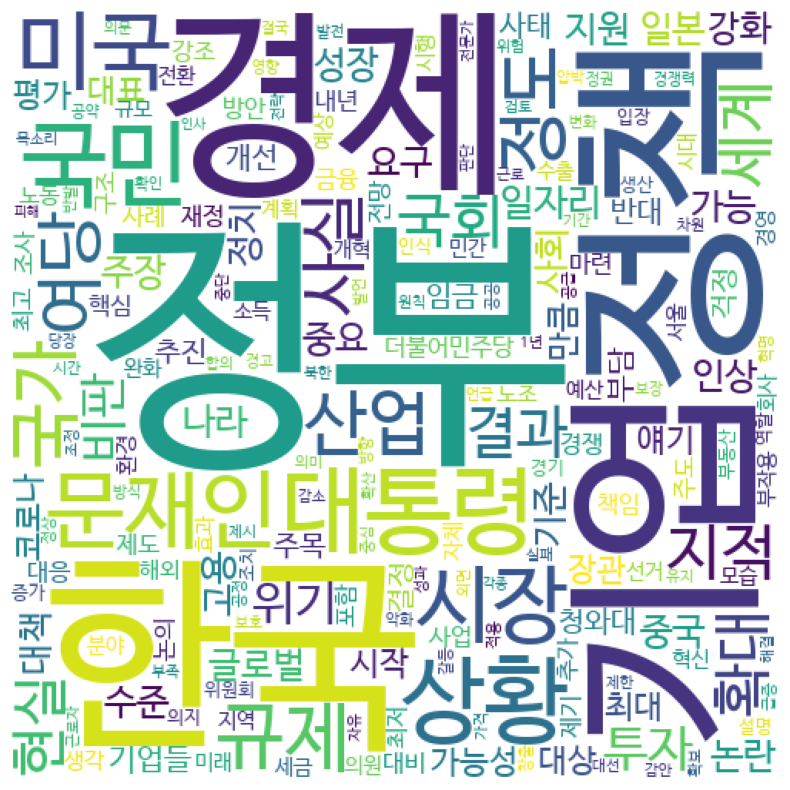

In [11]:
bkp.press_keywords_wordcloud(df, '한국경제')

### 언론사별 키워드 분석 --> 매경

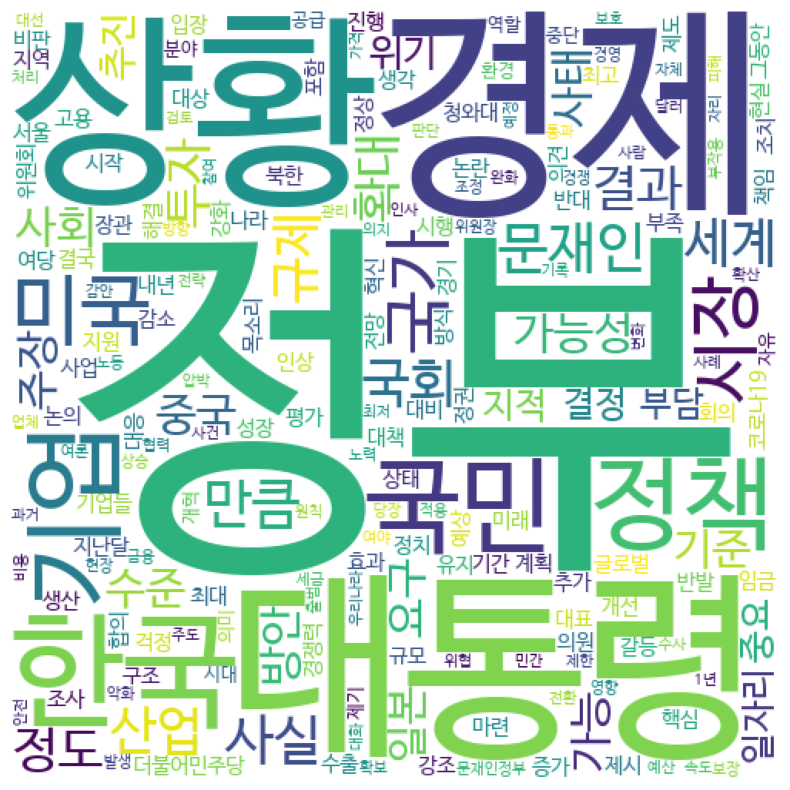

In [12]:
bkp.press_keywords_wordcloud(df, '매일경제')

### 언론사별 키워드 분석 --> 서경

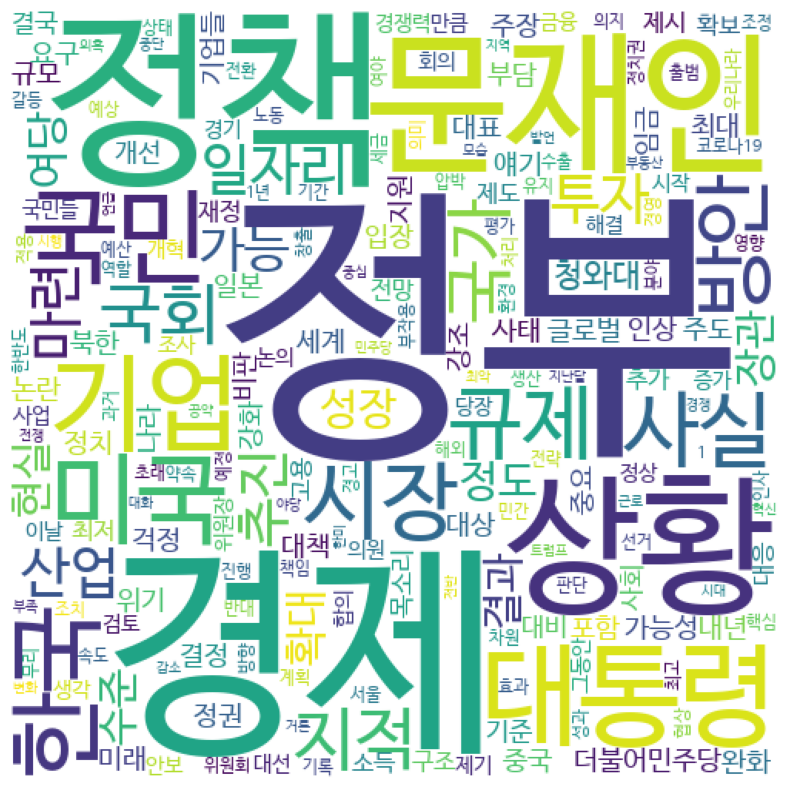

In [13]:
bkp.press_keywords_wordcloud(df, '서울경제')

### 언론사별 키워드 분석 --> 파이낸셜

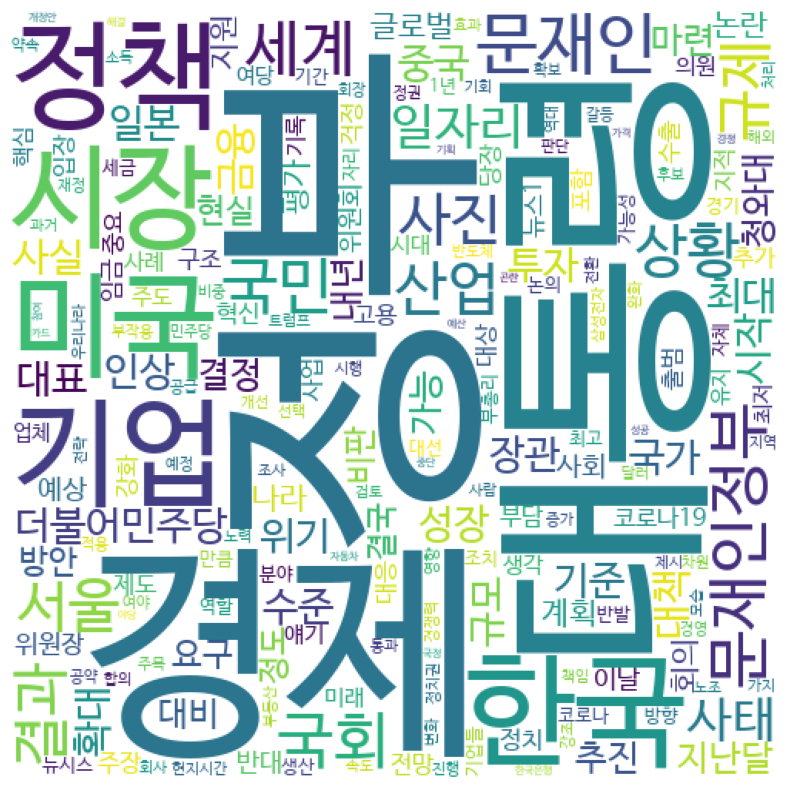

In [14]:
bkp.press_keywords_wordcloud(df, '파이낸셜뉴스')

### 언론사별 키워드 분석 --> 헤럴드

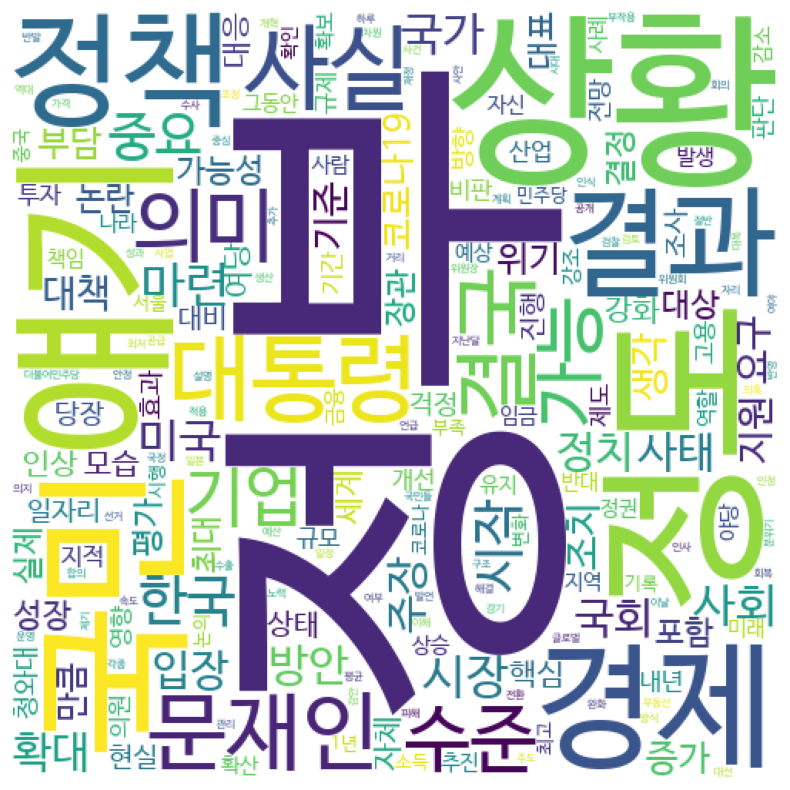

In [15]:
bkp.press_keywords_wordcloud(df, '헤럴드경제')

## TF-IDF 분석

언론사별 용어 빈도는 비슷 --> tf-idf를 통한 특징 추출 필요

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer #module import

### 한경 

In [17]:
han_words = df[df['언론사'] == '한국경제']

In [18]:
han_words = han_words['키워드']

In [19]:
tfidf = TfidfVectorizer()
tdm = tfidf.fit_transform(han_words)

In [20]:
word_count1 = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
}).sort_values('빈도', ascending = False).reset_index(drop = True)

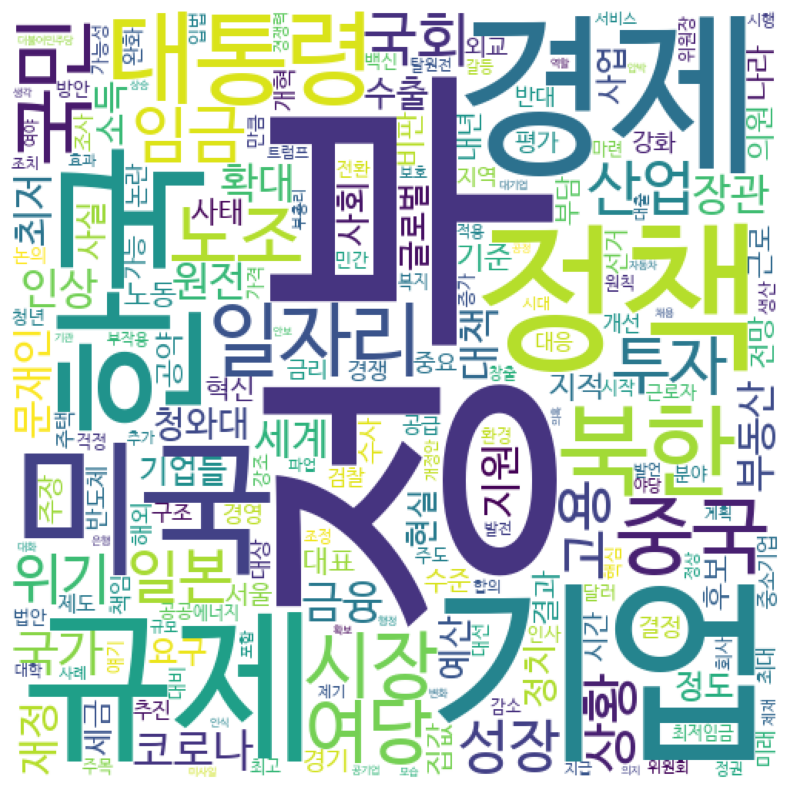

In [21]:
wc = WordCloud(font_path = './NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(word_count1.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 매경

In [22]:
mail_words = df[df['언론사'] == '매일경제']

In [23]:
mail_words = mail_words['키워드']

In [24]:
tfidf = TfidfVectorizer()
tdm = tfidf.fit_transform(mail_words)

In [25]:
word_count2 = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
}).sort_values('빈도', ascending = False).reset_index(drop = True)

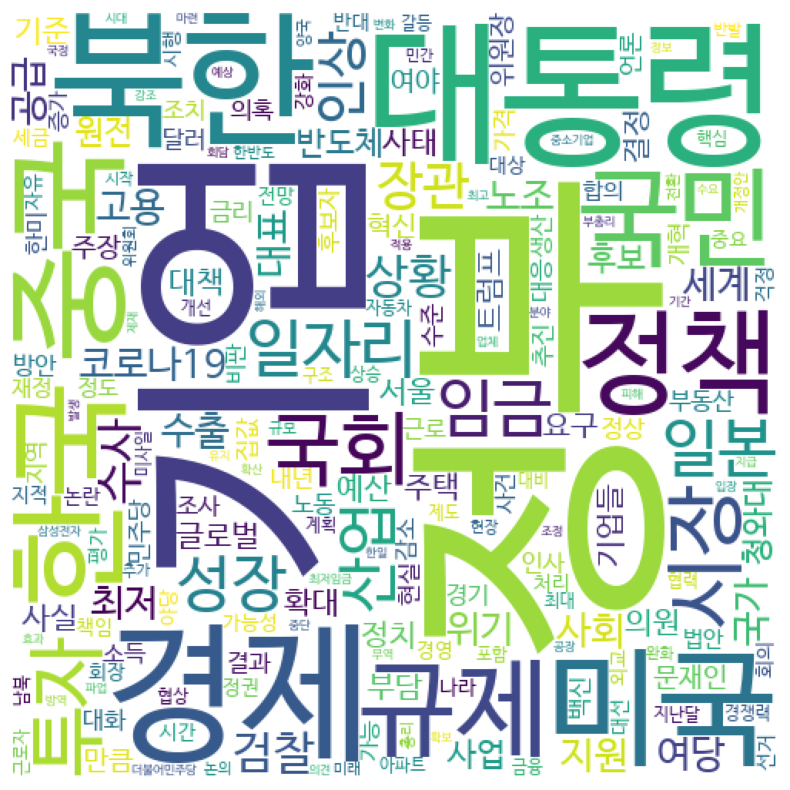

In [26]:
wc = WordCloud(font_path = './NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(word_count2.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 서경

In [27]:
seo_words = df[df['언론사'] == '서울경제']

In [28]:
seo_words = seo_words['키워드']

In [29]:
tfidf = TfidfVectorizer()
tdm = tfidf.fit_transform(seo_words)

In [30]:
word_count3 = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
}).sort_values('빈도', ascending = False).reset_index(drop = True)

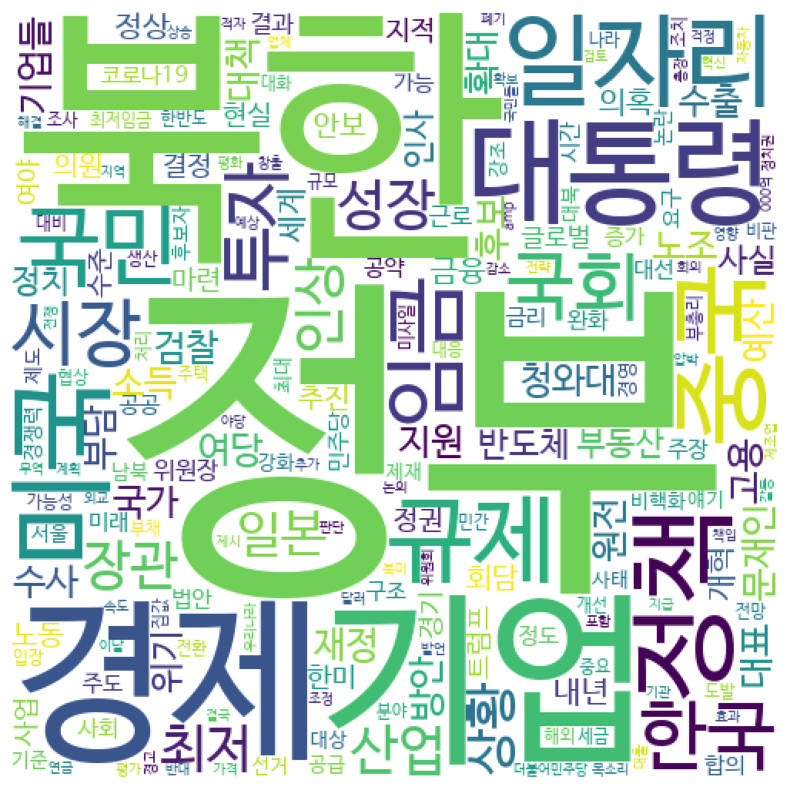

In [31]:
wc = WordCloud(font_path = './NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(word_count3.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 파이낸셜

In [32]:
fin_words = df[df['언론사'] == '파이낸셜뉴스']

In [33]:
fin_words = fin_words['키워드']

In [34]:
tfidf = TfidfVectorizer()
tdm = tfidf.fit_transform(fin_words)

In [35]:
word_count4 = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
}).sort_values('빈도', ascending = False).reset_index(drop = True)

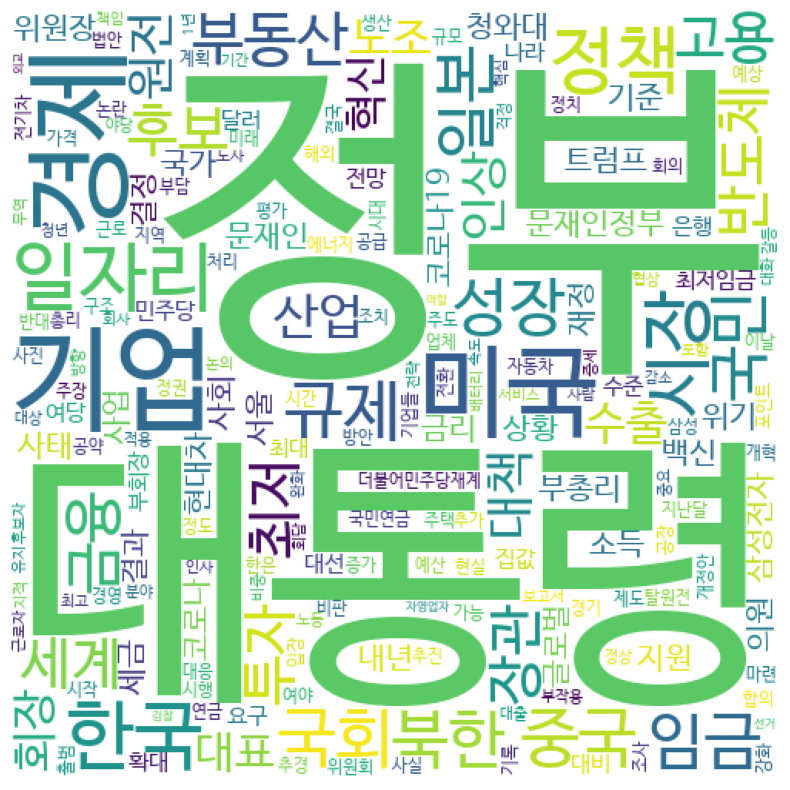

In [36]:
wc = WordCloud(font_path = './NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(word_count4.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 헤럴드

In [37]:
hero_words = df[df['언론사'] == '헤럴드경제']

In [38]:
hero_words = hero_words['키워드']

In [39]:
tfidf = TfidfVectorizer()
tdm = tfidf.fit_transform(hero_words)

In [40]:
word_count5 = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
}).sort_values('빈도', ascending = False).reset_index(drop = True)

In [41]:
wc = WordCloud(font_path = './NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(word_count5.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [42]:
words_df1 = pd.concat([word_count1, word_count2], join='outer', axis=1)

In [43]:
words_df1.columns = ['단어(한경)', '빈도(한경)', '단어(매경)', '빈도(매경)']

In [44]:
words_df2 = pd.concat([word_count3, word_count4, word_count5], join='outer', axis=1)

In [45]:
words_df2.columns = ['단어(서경)', '빈도(서경)','단어(파이낸셜)', '빈도(파이낸셜)','단어(헤럴드)', '빈도(헤럴드)']

In [46]:
words_df = pd.concat([words_df1, words_df2], join = 'outer', axis = 1)

In [47]:
words_df.head(20)

단어(한경)      빈도(한경) 단어(매경)      빈도(매경) 단어(서경)      빈도(서경) 단어(파이낸셜)  \
0      정부  170.874039     정부  127.335164     정부  207.973736       정부   
1      기업  143.353837     기업  110.468213     북한  153.504708      대통령   
2      경제  109.593958    대통령  105.349634     기업  147.576313       기업   
3      규제   99.747167     경제   98.987800     경제  141.483724       경제   
4      한국   96.602629     북한   94.959321    대통령  136.803875       미국   
5      정책   95.039328     미국   93.682823     정책  125.951686      일자리   
6      미국   90.302124     중국   87.481722     미국  125.941853       한국   
7     대통령   89.964928     한국   86.394644    일자리  108.601917       정책   
8      북한   86.210303     정책   76.064262     중국  104.657793       시장   
9      중국   83.305281     국민   73.182543     규제  100.005150       규제   
10     국민   79.407091     규제   68.673798     국민   97.847511       국회   
11    일자리   79.164376     국회   64.407326     임금   88.199132       중국   
12     시장   68.216227     시장   63.713174     한국   84.390802       일본   
13     노조   67.212984     투자   61.656313     국회   83.832130       성장   
14     여당   64.899902    일자리   60.358299     투자   81.507045       임금   
15     투자   64.160446     임금   59.657628     시장   80.210144       북한   
16     임금   62.896762     일본   58.333997     성장   79.884542       국민   
17     산업   60.127337     성장   52.338215     장관   74.306424      부동산   
18     일본   58.510270     산업   52.099878     산업   73.267545       후보   
19     국회   58.063480     장관   51.585880     인상   73.013147      반도체   

     빈도(파이낸셜) 단어(헤럴드)    빈도(헤럴드)  
0   96.774121      정부  68.249231  
1   78.668422     대통령  55.984063  
2   73.745679      경제  47.226472  
3   66.228374      국민  43.421289  
4   60.756488      기업  43.096729  
5   58.554333      정책  41.426563  
6   57.845017      검찰  36.136012  
7   53.730281      상황  35.747487  
8   51.787001      미국  34.320186  
9   45.949896      국회  33.419709  
10  43.571681      북한  32.206295  
11  42.673492      장관  32.127931  
12  40.091627      한국  31.377541  
13  39.962075     일자리  30.921592  
14  39.627805      성장  30.897654  
15  39.523417      임금  30.480363  
16  38.434493      대표  29.536249  
17  35.483854      인상  28.477505  
18  34.080738      정도  28.369887  
19  33.821207      정치  27.913461

## Dimension Reduction

In [48]:
def targeting(x):
    if x == '한국경제':
        return 0
    elif x == '매일경제':
        return 1
    elif x == '서울경제':
        return 2
    elif x == '파이낸셜뉴스':
        return 3
    elif x == '헤럴드경제':
        return 4
    elif x == '아시아경제':
        return 5
    

In [49]:
df['target'] = df['언론사'].apply(lambda x : targeting(x))

In [50]:
df2021 = df[df['일자'] >= 20210100]

In [51]:
text = df2021['키워드']
text_df = df2021[['언론사', '제목']]

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
vec = pipeline.fit_transform(text).todense()

pca_df = PCA(n_components=2).fit_transform(vec)

pca_df = pd.DataFrame(pca_df, columns = ['component 0', 'component 1'])

In [53]:
pca_df['target'] = df['target']

# target 별 분리
pca_0 = pca_df[pca_df['target'] == 0]
pca_1 = pca_df[pca_df['target'] == 1]
pca_2 = pca_df[pca_df['target'] == 2]
pca_3 = pca_df[pca_df['target'] == 3]
pca_4 = pca_df[pca_df['target'] == 4]
pca_5 = pca_df[pca_df['target'] == 5]

# target 별 시각화
plt.scatter(pca_0['component 0'], pca_0['component 1'], color = 'blue', label = '한국경제')
plt.scatter(pca_1['component 0'], pca_1['component 1'], color = 'orange', label = '매일경제')
plt.scatter(pca_2['component 0'], pca_2['component 1'], color = 'green', label = '서울경제')
plt.scatter(pca_3['component 0'], pca_3['component 1'], color = 'yellow', label = '파이낸셜')
plt.scatter(pca_4['component 0'], pca_4['component 1'], color = 'pink', label = '헤럴드')
plt.scatter(pca_5['component 0'], pca_5['component 1'], color = 'purple', label = '아시아경제')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

In [54]:
from sklearn.decomposition import TruncatedSVD

svd_df = TruncatedSVD(n_components = 2).fit_transform(vec)

svd_df = pd.DataFrame(svd_df, columns = ['component 0', 'component 1'])

In [55]:
# class target 정보 불러오기 
svd_df['target'] = df['target']

# target 별 분리
svd_0 = svd_df[svd_df['target'] == 0]
svd_1 = svd_df[svd_df['target'] == 1]
svd_2 = svd_df[svd_df['target'] == 2]
svd_3 = svd_df[svd_df['target'] == 3]
svd_4 = svd_df[svd_df['target'] == 4]
svd_5 = svd_df[svd_df['target'] == 5]

# target 별 시각화
plt.scatter(svd_0['component 0'], svd_0['component 1'], color = 'blue', alpha = 0.7, label = '한국경제')
plt.scatter(svd_1['component 0'], svd_1['component 1'], color = 'orange', alpha = 0.7, label = '매일경제')
plt.scatter(svd_2['component 0'], svd_2['component 1'], color = 'green', alpha = 0.7, label = '서울경제')
plt.scatter(svd_3['component 0'], svd_3['component 1'], color = 'yellow', alpha = 0.7, label = '파이낸셜')
plt.scatter(svd_4['component 0'], svd_4['component 1'], color = 'pink', alpha = 0.7, label = '헤럴드')
plt.scatter(svd_5['component 0'], svd_5['component 1'], color = 'purple', alpha = 0.7, label = '아시아경제')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

In [56]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=400).fit_transform(vec)

tsne_df = pd.DataFrame(tsne, columns = ['component 0', 'component 1'])

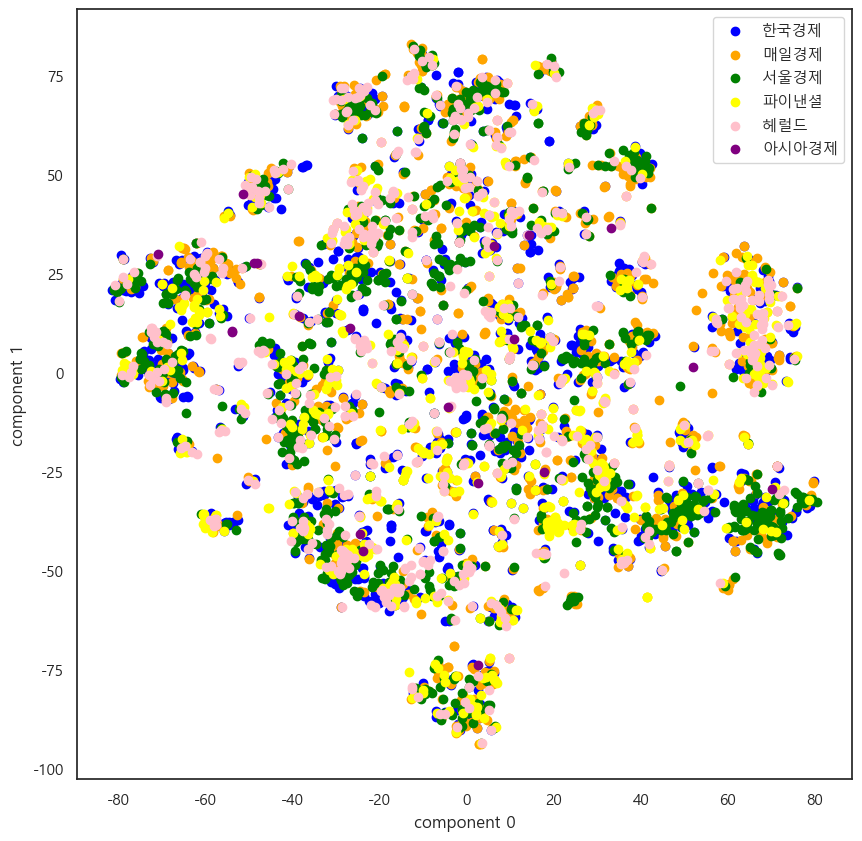

In [57]:
# class target 정보 불러오기 
tsne_df['target'] = df['target']

# target 별 분리
tsne_0 = tsne_df[tsne_df['target'] == 0]
tsne_1 = tsne_df[tsne_df['target'] == 1]
tsne_2 = tsne_df[tsne_df['target'] == 2]
tsne_3 = tsne_df[tsne_df['target'] == 3]
tsne_4 = tsne_df[tsne_df['target'] == 4]
tsne_5 = tsne_df[tsne_df['target'] == 5]

# target 별 시각화
plt.scatter(tsne_0['component 0'], tsne_0['component 1'], color = 'blue', label = '한국경제')
plt.scatter(tsne_1['component 0'], tsne_1['component 1'], color = 'orange', label = '매일경제')
plt.scatter(tsne_2['component 0'], tsne_2['component 1'], color = 'green', label = '서울경제')
plt.scatter(tsne_3['component 0'], tsne_3['component 1'], color = 'yellow', label = '파이낸셜')
plt.scatter(tsne_4['component 0'], tsne_4['component 1'], color = 'pink', label = '헤럴드')
plt.scatter(tsne_5['component 0'], tsne_5['component 1'], color = 'purple', label = '아시아경제')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

t-SNE 결과, 문서 간의 일종의 군집이 존재하는 것으로 추정

문서 군집화를 시도해보면 좋으리라 생각

## DBSCAN

In [58]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
vec_mms = mms.fit_transform(vec)

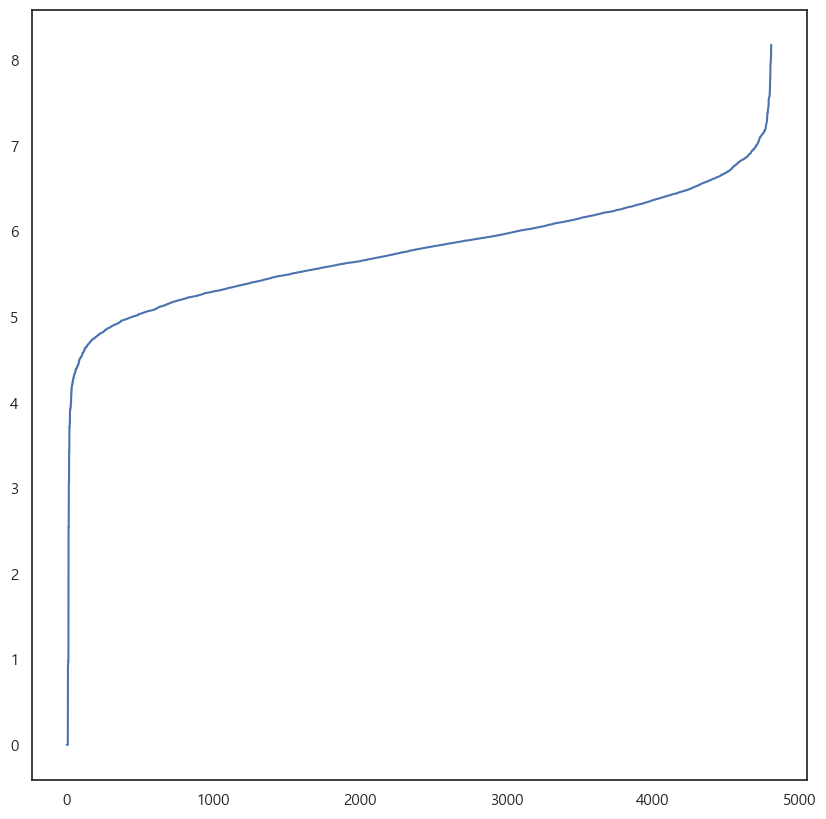

In [59]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(vec_mms)
distances, indices = nbrs.kneighbors(vec_mms)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)

In [60]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps= 7, min_samples= 4, metric = "cosine") 
cluster = dbs.fit_predict(vec_mms)
text_df['군집'] = cluster

print('군집개수 :', cluster.max())

군집개수 : 0


In [61]:
text_df.groupby('군집').size()

군집
0    4809
dtype: int64

군집이 1개 밖에 형성되지 X

DBSCAN은 해당 요소에 사용할 만한 모델 X

## K-Means

In [62]:
from sklearn.preprocessing import Normalizer

nor = Normalizer()
vec_nor = nor.fit_transform(vec)

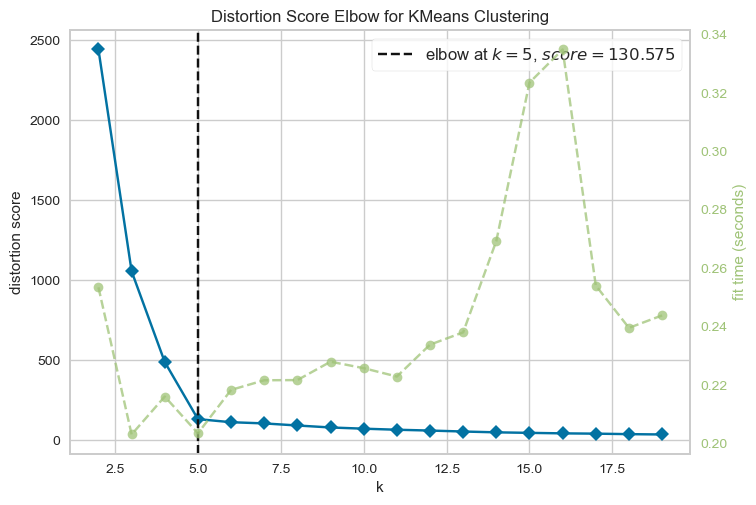

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

vzr = KElbowVisualizer(KMeans(), k=(2, 20))
vzr.fit(pca_df)
vzr.poof()

In [64]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans= KMeans(n_clusters=5, max_iter=1000, random_state=0) #최적 Topic 개수 5개를 기점으로 진행
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

In [65]:
visualizer.fit(vec_nor)
visualizer.show()

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 4809 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

k 값을 바꿔도
실루엣 계수가 지속적으로 0.3 미만으로 나오고 있음

Text 데이터 상 존재하는 한계인 것인지, 아니면 정말 군집화가 잘 안된 것인지 추후 확인 필요

In [66]:
kmeans.fit(vec_nor)

labels = kmeans.labels_

text_df['군집'] = labels

In [67]:
text_df.groupby('군집').size()

군집
0     421
1     265
2     430
3    2627
4    1066
dtype: int64

In [68]:
# text_df[text_df['군집'] == 0].tail(20)
# text_df[text_df['군집'] == 1].tail(20)
# text_df[text_df['군집'] == 2].tail(20)
# text_df[text_df['군집'] == 3].tail(20)
# text_df[text_df['군집'] == 4].tail(20)

0번 토픽 = 부동산 관련 칼럼
</br>
1번 토픽 = 코로나 관련 칼럼
</br>
2번 토픽 = 북한 관련 칼럼
</br>
3번 토픽 = 경제 정책 관련 칼럼
</br>
4번 토픽 = 정치 이슈 관련 칼럼

In [71]:
pca_df['cluster'] = labels

pca_clu_0 = pca_df[pca_df['cluster'] == 0]
pca_clu_1 = pca_df[pca_df['cluster'] == 1]
pca_clu_2 = pca_df[pca_df['cluster'] == 2]
pca_clu_3 = pca_df[pca_df['cluster'] == 3]
pca_clu_4 = pca_df[pca_df['cluster'] == 4]

plt.scatter(pca_clu_0['component 0'], pca_clu_0['component 1'], color = 'blue', label = '부동산')
plt.scatter(pca_clu_1['component 0'], pca_clu_1['component 1'], color = 'orange', label = '코로나')
plt.scatter(pca_clu_2['component 0'], pca_clu_2['component 1'], color = 'green', label = '북한')
plt.scatter(pca_clu_3['component 0'], pca_clu_3['component 1'], color = 'purple', label = '경제 정책')
plt.scatter(pca_clu_4['component 0'], pca_clu_4['component 1'], color = 'red', label = '정치')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

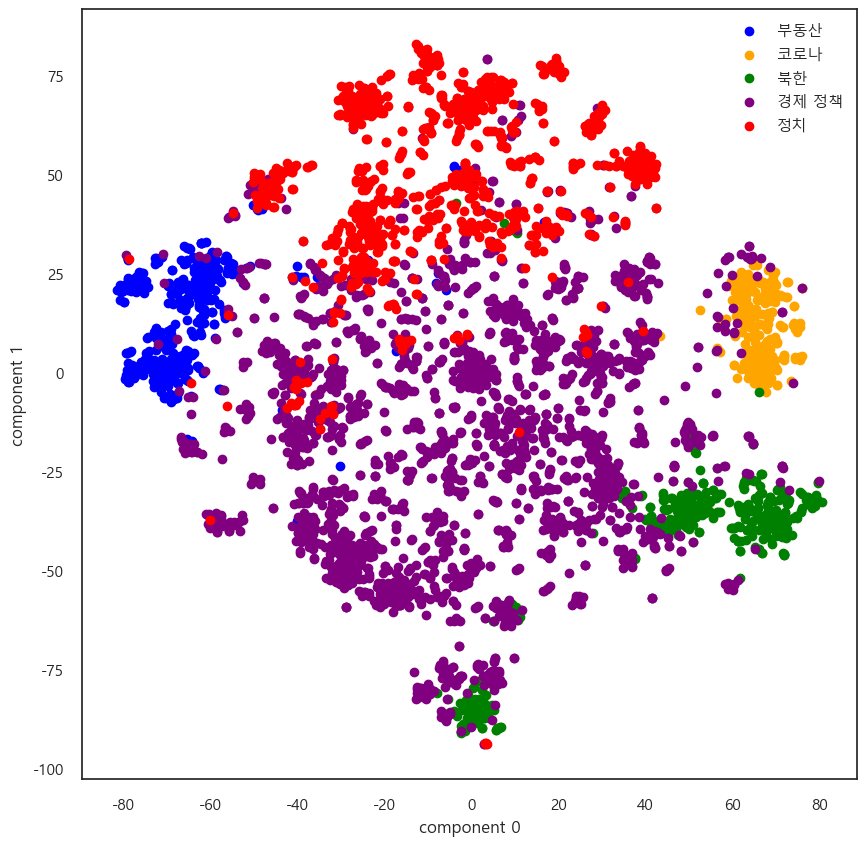

In [72]:
tsne_df['cluster'] = labels

tsne_clu0 = tsne_df[tsne_df['cluster'] == 0]
tsne_clu1 = tsne_df[tsne_df['cluster'] == 1]
tsne_clu2 = tsne_df[tsne_df['cluster'] == 2]
tsne_clu3 = tsne_df[tsne_df['cluster'] == 3]
tsne_clu4 = tsne_df[tsne_df['cluster'] == 4]

# target 별 시각화
plt.scatter(tsne_clu0['component 0'], tsne_clu0['component 1'], color = 'blue', label = '부동산')
plt.scatter(tsne_clu1['component 0'], tsne_clu1['component 1'], color = 'orange', label = '코로나')
plt.scatter(tsne_clu2['component 0'], tsne_clu2['component 1'], color = 'green', label = '북한')
plt.scatter(tsne_clu3['component 0'], tsne_clu3['component 1'], color = 'purple', label = '경제 정책')
plt.scatter(tsne_clu4['component 0'], tsne_clu4['component 1'], color = 'red', label = '정치')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

## Topic Modelling

In [90]:
news_words = bkp.keyword_parser(df_keywords)

In [91]:
import gensim
news_dict = gensim.corpora.Dictionary(news_words)
corpus = [news_dict.doc2bow(text) for text in news_words]

In [92]:
perplexity = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=news_dict)
    perplexity.append(ldamodel.log_perplexity(corpus))

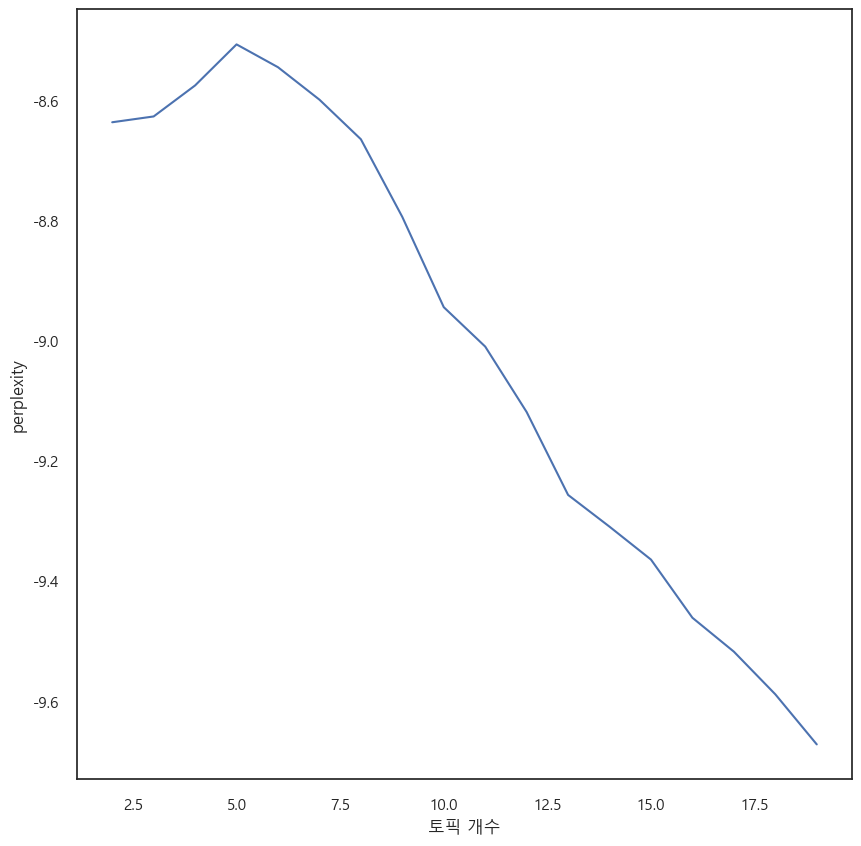

In [93]:
x = range(2,20)
plt.plot(x,perplexity)
plt.xlabel("토픽 개수")
plt.ylabel("perplexity")
plt.show()

In [94]:
coherence = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=news_dict)
    coherence_mo_lda = gensim.models.CoherenceModel(model = ldamodel, texts = news_words, dictionary = news_dict, topn=10) 
    coherence_lda = coherence_mo_lda.get_coherence()
    coherence.append(coherence_lda)

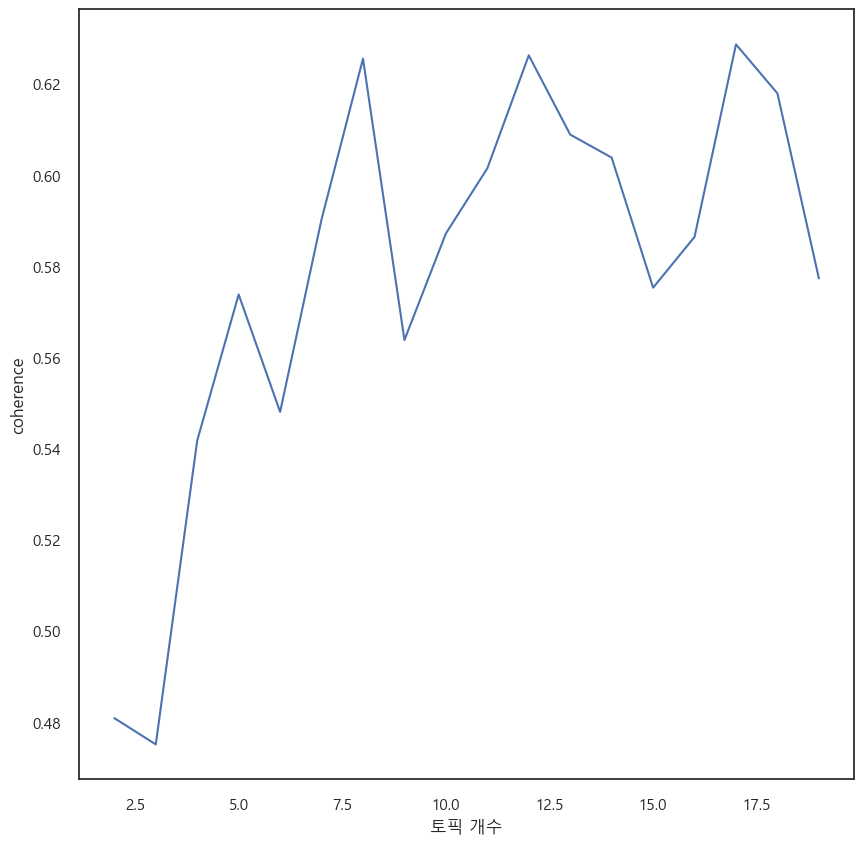

In [95]:
x = range(2,20)
plt.plot(x,coherence)
plt.xlabel("토픽 개수")
plt.ylabel("coherence")
plt.show()

In [121]:
NUM_TOPICS = 8
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=news_dict, passes=15)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.022*"경제" + 0.018*"한국" + 0.014*"미국" + 0.013*"기업" + 0.012*"중국"')
(1, '0.030*"북한" + 0.022*"미국" + 0.021*"대통령" + 0.012*"중국" + 0.012*"정부"')
(2, '0.024*"정부" + 0.022*"임금" + 0.021*"일자리" + 0.017*"정책" + 0.015*"최저"')
(3, '0.026*"정부" + 0.015*"예산" + 0.014*"재정" + 0.013*"국민" + 0.010*"지원"')
(4, '0.028*"기업" + 0.016*"규제" + 0.014*"정부" + 0.012*"노조" + 0.007*"산업"')
(5, '0.021*"정부" + 0.017*"부동산" + 0.016*"시장" + 0.012*"주택" + 0.012*"정책"')
(6, '0.014*"대통령" + 0.013*"국회" + 0.011*"국민" + 0.009*"장관" + 0.008*"청와대"')
(7, '0.011*"정부" + 0.005*"은행" + 0.005*"금융" + 0.005*"서비스" + 0.005*"대학"')


In [122]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, news_dict)
pyLDAvis.display(vis)

c:\Users\cjsso\AppData\Local\R-MINI~1\envs\vspy\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [123]:
pyLDAvis.save_html(vis, 'economic_LDA.html') #LDAvis save

In [124]:
def make_topictable(ldamodel, corpus):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0: 
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
    return(topic_table)

In [125]:
topictable = make_topictable(ldamodel, corpus)
topictable = topictable.reset_index() 

In [126]:
topictable.columns = ['뉴스 번호', '주요 토픽', '주요 토픽 비중', '토픽 별 비중']
topictable.head(20)

뉴스 번호  주요 토픽  주요 토픽 비중                                            토픽 별 비중
0       0      6    0.6048  [(0, 0.2064943), (1, 0.14548959), (3, 0.040591...
1       1      6    0.6396  [(1, 0.013829319), (3, 0.025971761), (6, 0.639...
2       2      2    0.2353  [(0, 0.108255014), (1, 0.17260873), (2, 0.2353...
3       3      0    0.4426  [(0, 0.44255796), (2, 0.033251688), (3, 0.0778...
4       4      6    0.7102  [(0, 0.06285721), (1, 0.04619494), (3, 0.12879...
5       5      6    0.9291  [(0, 0.023250746), (3, 0.044005822), (6, 0.929...
6       6      5    0.9600                 [(2, 0.02764032), (5, 0.95999163)]
7       7      6    0.4911  [(3, 0.12609059), (6, 0.49112323), (7, 0.37880...
8       8      4    0.3742  [(0, 0.29967743), (3, 0.19968987), (4, 0.37421...
9       9      3    0.5458                 [(0, 0.44934246), (3, 0.54580617)]
10     10      1    0.8036  [(1, 0.8036028), (2, 0.026663348), (5, 0.03072...
11     11      6    0.8718  [(0, 0.017928863), (1, 0.05863967), (3, 0.0491...
12     12      0    0.8740  [(0, 0.8739971), (1, 0.07806261), (3, 0.024650...
13     13      0    0.8887  [(0, 0.88869303), (3, 0.052332226), (4, 0.0207...
14     14      0    0.3246  [(0, 0.324553), (1, 0.13662183), (4, 0.0654086...
15     15      1    0.8963  [(0, 0.037281796), (1, 0.89630705), (3, 0.0286...
16     16      0    0.8860  [(0, 0.8860053), (3, 0.034988325), (5, 0.07448...
17     17      7    0.3927  [(2, 0.26502338), (4, 0.2484733), (6, 0.090291...
18     18      5    0.3266  [(1, 0.0764646), (2, 0.11273226), (3, 0.174080...
19     19      3    0.8966  [(3, 0.896564), (4, 0.043536857), (5, 0.055691...

In [127]:
news_topic_df = pd.concat([df[['제목', '언론사']],topictable['주요 토픽']], axis = 1)

In [128]:
news_topic_df.to_excel("./news_topic.xlsx")